In [1]:
!python --version

Python 3.9.2


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

In [3]:
conn = sqlite3.connect("../../streamdb.db")

In [4]:
c = conn.cursor()

# Read Lapdata and determine sessionTime of each new Lap

In [5]:
session_name = 'race_brasilien_serie_b'

In [6]:
sql = f"""SELECT * FROM {session_name}_lapdata"""
c.execute(sql)
data = c.fetchall()
data[:1]

[(1, 3.420146942138672, 0.0, 0.0, 5.150604724884033, 5.150604724884033, 4, 1)]

In [7]:
lapdata = pd.DataFrame(data, columns =['id', 'sessionTime', 'lastLapTime', 'currentLapTime', 'lapDistance', 'totalDistance', 'carPosition', 'currentLapNum'])
lapdata.head()

id  sessionTime  lastLapTime  currentLapTime  lapDistance  totalDistance  \
0   1     3.420147          0.0             0.0     5.150605       5.150605   
1   2     4.237291          0.0             0.0    14.208529      14.208529   
2   3     4.454258          0.0             0.0    17.570559      17.570559   
3   4     4.654431          0.0             0.0    21.041466      21.041466   
4   5     5.054805          0.0             0.0    29.082533      29.082533   

   carPosition  currentLapNum  
0            4              1  
1            4              1  
2            4              1  
3            4              1  
4            4              1

In [8]:
laptimes = lapdata['lastLapTime'].unique()
last_lap = lapdata[lapdata['currentLapNum'] == len(laptimes)]['currentLapTime'].max()
laptimes = np.append(laptimes, last_lap)
laptimes

array([0.00000000e+00, 1.05069061e+02, 9.37473450e+01, 1.10427673e+02,
       8.30643311e+01, 7.21117249e+01, 7.20513000e+01, 7.21244507e+01,
       7.22775269e+01, 7.24506226e+01, 7.24869385e+01, 7.18220215e+01,
       7.20374146e+01, 7.18409424e+01, 7.16475830e+01, 7.17330322e+01,
       7.18745117e+01, 7.17663574e+01, 7.20385742e+01, 7.19025879e+01,
       7.17572021e+01, 7.16198730e+01, 7.23526611e+01, 7.64099121e+01,
       8.73828125e+01, 7.11535645e+01, 7.13566895e+01, 7.13570557e+01,
       7.11369629e+01, 7.14592285e+01, 7.11696777e+01, 7.14289551e+01,
       7.12224121e+01, 7.13852539e+01, 7.13176270e+01, 7.11608887e+01,
       7.11440430e+01, 7.64106445e+01, 7.16525879e+01, 7.12866211e+01,
       7.16528320e+01, 7.12841797e+01, 7.09387207e+01, 7.10332031e+01,
       7.14331055e+01, 7.07761230e+01, 7.06369629e+01, 7.26186523e+01,
       7.49577637e+01, 8.53730469e+01, 7.00102539e+01, 6.99538574e+01,
       7.04196777e+01, 6.99550781e+01, 7.00832520e+01, 7.02421875e+01,
      

In [15]:
sns.scatterplot(x=range(1, len(laptimes)), y=laptimes[1:], s=50)
plt.ylim(69, 75)
plt.title("Laptimes");
plt.savefig("laptimes.png")

In [16]:
unique_laptimes = lapdata[lapdata['lastLapTime'] > 0]['lastLapTime'].unique()
print("Best Laptime:", np.min(unique_laptimes))
print("Median:", np.median(unique_laptimes))
print("Mean:", np.mean(unique_laptimes))
print("Standard Deviation:", np.std(unique_laptimes))
print("Slowest Laptime:", np.max(unique_laptimes))
sns.boxplot(y=unique_laptimes, showfliers = False)
plt.title("Laptime Distribution w/o outliers")
plt.draw()
plt.savefig("laptimes_boxplot.png")

Best Laptime: 69.7109375
Median: 71.3570556640625
Mean: 73.44967264524648
Standard Deviation: 7.250438925946849
Slowest Laptime: 110.42767333984375


In [17]:
for i, timing in enumerate(lapdata['lastLapTime'].unique()):
    print(i, timing)

0 0.0
1 105.06906127929688
2 93.74734497070312
3 110.42767333984375
4 83.0643310546875
5 72.11172485351562
6 72.05130004882812
7 72.12445068359375
8 72.27752685546875
9 72.45062255859375
10 72.4869384765625
11 71.822021484375
12 72.03741455078125
13 71.8409423828125
14 71.6475830078125
15 71.7330322265625
16 71.87451171875
17 71.766357421875
18 72.03857421875
19 71.902587890625
20 71.7572021484375
21 71.619873046875
22 72.3526611328125
23 76.409912109375
24 87.3828125
25 71.153564453125
26 71.356689453125
27 71.3570556640625
28 71.136962890625
29 71.459228515625
30 71.169677734375
31 71.428955078125
32 71.222412109375
33 71.38525390625
34 71.317626953125
35 71.160888671875
36 71.14404296875
37 76.41064453125
38 71.652587890625
39 71.28662109375
40 71.65283203125
41 71.2841796875
42 70.938720703125
43 71.033203125
44 71.43310546875
45 70.776123046875
46 70.636962890625
47 72.61865234375
48 74.957763671875
49 85.373046875
50 70.01025390625
51 69.953857421875
52 70.419677734375
53 69.9550

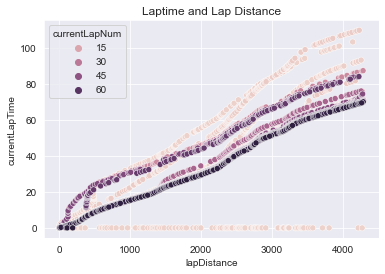

In [18]:
sns.scatterplot(x='lapDistance', y='currentLapTime', hue='currentLapNum', data=lapdata)
plt.title("Laptime and Lap Distance");
plt.savefig("laptimes_lapdistance.png")

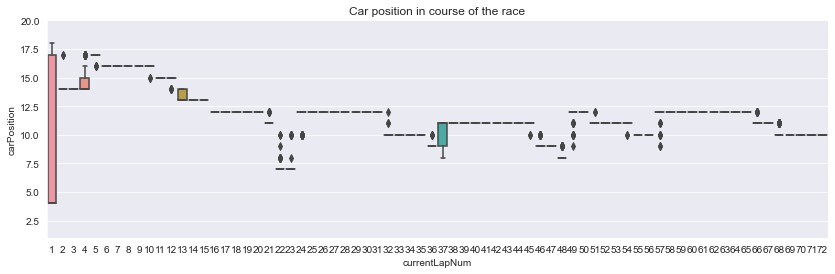

In [19]:
plt.figure(figsize=(14,4))
sns.boxplot(x='currentLapNum', y='carPosition', data=lapdata)
plt.ylim(1,20)
plt.title("Car position in course of the race");
plt.savefig("positions.png")

In [20]:
# Determine the sessiontime at every end of a lap
upper_boundaries = [0]
for lap in lapdata['currentLapNum'].unique():
    upper_boundary = lapdata[lapdata['currentLapNum'] == lap]['sessionTime'].max()
    upper_boundaries.append(upper_boundary)
upper_boundaries[:5]

[0,
 140.50746154785156,
 205.8186492919922,
 316.12066650390625,
 398.44720458984375]

# Telemetry Data

In [21]:
sql = f"""SELECT * FROM {session_name}_telemetry"""
c.execute(sql)
data = c.fetchall()
data[:1]

[(1,
  0.058278344571590424,
  0,
  0.21953155100345612,
  0.003308214945718646,
  0.0,
  1,
  12998.0,
  0,
  32.0,
  32.0,
  32.0,
  32.0,
  59.0,
  59.0,
  55.0,
  55.0,
  69.0,
  69.0,
  55.0,
  55.0,
  83.0)]

In [22]:
column_names = [description[0] for description in c.description]
column_names[:5]

['id', 'sessionTime', 'speed', 'throttle', 'steer']

In [23]:
telemetry = pd.DataFrame(data, columns =column_names)
telemetry.head()

id  sessionTime  speed  throttle     steer  brake  gear  engineRPM  drs  \
0   1     0.058278      0  0.219532  0.003308    0.0     1    12998.0    0   
1   2     0.317015      0  0.209766  0.002625    0.0     1    13003.0    0   
2   3     1.551534      0  0.221973  0.008020    0.0     1    12997.0    0   
3   4     1.735110      0  0.220996  0.007971    0.0     1    13000.0    0   
4   5     1.952003      0  0.246632  0.007971    0.0     1    13001.0    0   

   brakesTemperature_RL  brakesTemperature_RR  brakesTemperature_FL  \
0                  32.0                  32.0                  32.0   
1                  32.0                  32.0                  32.0   
2                  32.0                  32.0                  32.0   
3                  32.0                  32.0                  32.0   
4                  32.0                  32.0                  32.0   

   brakesTemperature_FR  tyresSurfaceTemperature_RL  \
0                  32.0                        59.0   
1                  32.0                        59.0   
2                  32.0                        58.0   
3                  32.0                        58.0   
4                  32.0                        58.0   

   tyresSurfaceTemperature_RR  tyresSurfaceTemperature_FL  \
0                        59.0                        55.0   
1                        59.0                        55.0   
2                        58.0                        55.0   
3                        58.0                        55.0   
4                        58.0                        55.0   

   tyresSurfaceTemperature_FR  tyresInnerTemperature_RL  \
0                        55.0                      69.0   
1                        55.0                      69.0   
2                        55.0                      68.0   
3                        55.0                      68.0   
4                        55.0                      68.0   

   tyresInnerTemperature_RR  tyresInnerTemperature_FL  \
0                      69.0                      55.0   
1                      69.0                      55.0   
2                      68.0                      55.0   
3                      68.0                      55.0   
4                      68.0                      55.0   

   tyresInnerTemperature_FR  engineTemperature  
0                      55.0               83.0  
1                      55.0               84.0  
2                      55.0               84.0  
3                      55.0               84.0  
4                      55.0               84.0

In [24]:
intervals = []
for i in range(1, len(upper_boundaries)):
    tup = (upper_boundaries[i-1], upper_boundaries[i])
    intervals.append(tup)
intervals

[(0, 140.50746154785156),
 (140.50746154785156, 205.8186492919922),
 (205.8186492919922, 316.12066650390625),
 (316.12066650390625, 398.44720458984375),
 (398.44720458984375, 471.7480163574219),
 (471.7480163574219, 542.4634399414062),
 (542.4634399414062, 611.7107543945312),
 (611.7107543945312, 686.8618774414062),
 (686.8618774414062, 760.1290283203125),
 (760.1290283203125, 832.1785888671875),
 (832.1785888671875, 904.4453125),
 (904.4453125, 976.8116455078125),
 (976.8116455078125, 1047.378173828125),
 (1047.378173828125, 1119.8826904296875),
 (1119.8826904296875, 1192.0496826171875),
 (1192.0496826171875, 1263.6046142578125),
 (1263.6046142578125, 1335.687744140625),
 (1335.687744140625, 1401.217529296875),
 (1401.217529296875, 1479.5106201171875),
 (1479.5106201171875, 1551.62451171875),
 (1551.62451171875, 1623.0323486328125),
 (1623.0323486328125, 1693.544189453125),
 (1693.544189453125, 1771.376708984375),
 (1771.376708984375, 1859.3814697265625),
 (1859.3814697265625, 1930.48

In [25]:
bins = pd.IntervalIndex.from_tuples(intervals)
laps_intervals = pd.cut(telemetry['sessionTime'], bins)

In [26]:
telemetry['interval'] = laps_intervals
telemetry.head()

id  sessionTime  speed  throttle     steer  brake  gear  engineRPM  drs  \
0   1     0.058278      0  0.219532  0.003308    0.0     1    12998.0    0   
1   2     0.317015      0  0.209766  0.002625    0.0     1    13003.0    0   
2   3     1.551534      0  0.221973  0.008020    0.0     1    12997.0    0   
3   4     1.735110      0  0.220996  0.007971    0.0     1    13000.0    0   
4   5     1.952003      0  0.246632  0.007971    0.0     1    13001.0    0   

   brakesTemperature_RL  brakesTemperature_RR  brakesTemperature_FL  \
0                  32.0                  32.0                  32.0   
1                  32.0                  32.0                  32.0   
2                  32.0                  32.0                  32.0   
3                  32.0                  32.0                  32.0   
4                  32.0                  32.0                  32.0   

   brakesTemperature_FR  tyresSurfaceTemperature_RL  \
0                  32.0                        59.0   
1                  32.0                        59.0   
2                  32.0                        58.0   
3                  32.0                        58.0   
4                  32.0                        58.0   

   tyresSurfaceTemperature_RR  tyresSurfaceTemperature_FL  \
0                        59.0                        55.0   
1                        59.0                        55.0   
2                        58.0                        55.0   
3                        58.0                        55.0   
4                        58.0                        55.0   

   tyresSurfaceTemperature_FR  tyresInnerTemperature_RL  \
0                        55.0                      69.0   
1                        55.0                      69.0   
2                        55.0                      68.0   
3                        55.0                      68.0   
4                        55.0                      68.0   

   tyresInnerTemperature_RR  tyresInnerTemperature_FL  \
0                      69.0                      55.0   
1                      69.0                      55.0   
2                      68.0                      55.0   
3                      68.0                      55.0   
4                      68.0                      55.0   

   tyresInnerTemperature_FR  engineTemperature                   interval  
0                      55.0               83.0  (0.0, 140.50746154785156]  
1                      55.0               84.0  (0.0, 140.50746154785156]  
2                      55.0               84.0  (0.0, 140.50746154785156]  
3                      55.0               84.0  (0.0, 140.50746154785156]  
4                      55.0               84.0  (0.0, 140.50746154785156]

In [27]:
telemetry.isnull().sum()[telemetry.isnull().sum() > 0]

Series([], dtype: int64)

In [28]:
telemetry.dropna(subset=['interval'], axis=0, inplace=True)

In [29]:
lapnum = []
for i in range(0, len(telemetry)):
    value = telemetry.iloc[i].interval
    tup = eval(str(value).replace(']', ")"))
    lapn = intervals.index(tup) + 1
    lapnum.append(lapn)

lapnum[:5]

[1, 1, 1, 1, 1]

In [30]:
telemetry['lapNum'] = lapnum
telemetry.head()

id  sessionTime  speed  throttle     steer  brake  gear  engineRPM  drs  \
0   1     0.058278      0  0.219532  0.003308    0.0     1    12998.0    0   
1   2     0.317015      0  0.209766  0.002625    0.0     1    13003.0    0   
2   3     1.551534      0  0.221973  0.008020    0.0     1    12997.0    0   
3   4     1.735110      0  0.220996  0.007971    0.0     1    13000.0    0   
4   5     1.952003      0  0.246632  0.007971    0.0     1    13001.0    0   

   brakesTemperature_RL  brakesTemperature_RR  brakesTemperature_FL  \
0                  32.0                  32.0                  32.0   
1                  32.0                  32.0                  32.0   
2                  32.0                  32.0                  32.0   
3                  32.0                  32.0                  32.0   
4                  32.0                  32.0                  32.0   

   brakesTemperature_FR  tyresSurfaceTemperature_RL  \
0                  32.0                        59.0   
1                  32.0                        59.0   
2                  32.0                        58.0   
3                  32.0                        58.0   
4                  32.0                        58.0   

   tyresSurfaceTemperature_RR  tyresSurfaceTemperature_FL  \
0                        59.0                        55.0   
1                        59.0                        55.0   
2                        58.0                        55.0   
3                        58.0                        55.0   
4                        58.0                        55.0   

   tyresSurfaceTemperature_FR  tyresInnerTemperature_RL  \
0                        55.0                      69.0   
1                        55.0                      69.0   
2                        55.0                      68.0   
3                        55.0                      68.0   
4                        55.0                      68.0   

   tyresInnerTemperature_RR  tyresInnerTemperature_FL  \
0                      69.0                      55.0   
1                      69.0                      55.0   
2                      68.0                      55.0   
3                      68.0                      55.0   
4                      68.0                      55.0   

   tyresInnerTemperature_FR  engineTemperature                   interval  \
0                      55.0               83.0  (0.0, 140.50746154785156]   
1                      55.0               84.0  (0.0, 140.50746154785156]   
2                      55.0               84.0  (0.0, 140.50746154785156]   
3                      55.0               84.0  (0.0, 140.50746154785156]   
4                      55.0               84.0  (0.0, 140.50746154785156]   

   lapNum  
0       1  
1       1  
2       1  
3       1  
4       1

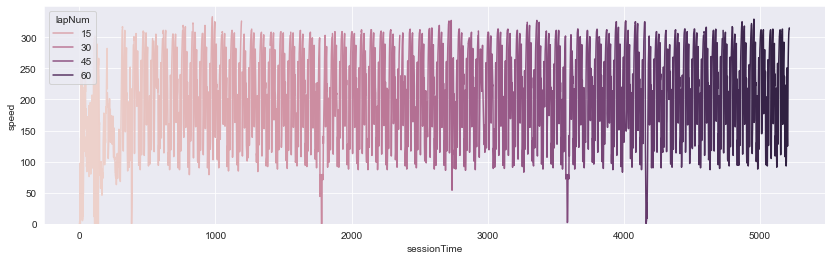

In [31]:
plt.figure(figsize=(14,4))
sns.lineplot(x=telemetry['sessionTime'], y=telemetry['speed'], hue=telemetry['lapNum'])
plt.ylim(0,);

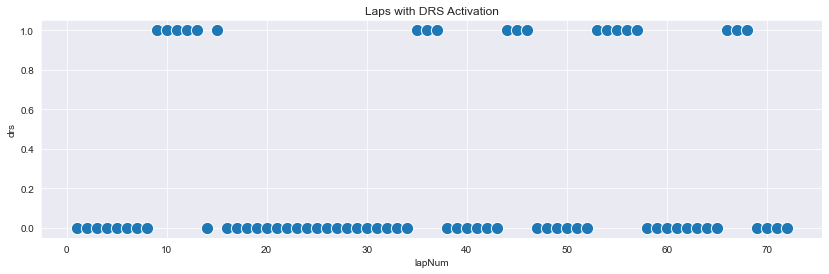

In [32]:
plt.figure(figsize=(14,4))
drs = telemetry.groupby(['lapNum'], as_index=False).max()[['lapNum', 'drs']]
sns.scatterplot(x='lapNum', y='drs', data=drs, s=150)
plt.title("Laps with DRS Activation");
plt.savefig("drs_activations.png")

In [33]:
for j, i in enumerate(intervals):
    print(f"Lap {j+1}: {i[0]}")

Lap 1: 0
Lap 2: 140.50746154785156
Lap 3: 205.8186492919922
Lap 4: 316.12066650390625
Lap 5: 398.44720458984375
Lap 6: 471.7480163574219
Lap 7: 542.4634399414062
Lap 8: 611.7107543945312
Lap 9: 686.8618774414062
Lap 10: 760.1290283203125
Lap 11: 832.1785888671875
Lap 12: 904.4453125
Lap 13: 976.8116455078125
Lap 14: 1047.378173828125
Lap 15: 1119.8826904296875
Lap 16: 1192.0496826171875
Lap 17: 1263.6046142578125
Lap 18: 1335.687744140625
Lap 19: 1401.217529296875
Lap 20: 1479.5106201171875
Lap 21: 1551.62451171875
Lap 22: 1623.0323486328125
Lap 23: 1693.544189453125
Lap 24: 1771.376708984375
Lap 25: 1859.3814697265625
Lap 26: 1930.486083984375
Lap 27: 2001.8724365234375
Lap 28: 2069.81689453125
Lap 29: 2144.28662109375
Lap 30: 2215.649658203125
Lap 31: 2286.750244140625
Lap 32: 2358.14111328125
Lap 33: 2428.988525390625
Lap 34: 2500.221435546875
Lap 35: 2571.056396484375
Lap 36: 2642.97119140625
Lap 37: 2714.0078125
Lap 38: 2790.125
Lap 39: 2861.526611328125
Lap 40: 2929.165283203125


# Compare two laps

In [34]:
lap1 = 15
lap2 = 20
excerpt1 = telemetry[telemetry['lapNum'] == lap1].copy()
excerpt2 = telemetry[telemetry['lapNum'] == lap2].copy()
excerpt1['normalizedTime'] = excerpt1['sessionTime'] - intervals[lap1-1][0]
excerpt2['normalizedTime'] = excerpt2['sessionTime'] - intervals[lap2-1][0]

In [35]:
compare_df = excerpt1.append(excerpt2)

In [36]:
plt.figure(figsize=(14,14))
plt.subplot(6,1,1)
sns.lineplot(x='normalizedTime', y='throttle', hue='lapNum', data=compare_df)
plt.subplot(6,1,2)
sns.lineplot(x='normalizedTime', y='speed', hue='lapNum', data=compare_df)
plt.subplot(6,1,3)
sns.lineplot(x='normalizedTime', y='steer', hue='lapNum', data=compare_df)
plt.subplot(6,1,4)
sns.lineplot(x='normalizedTime', y='drs', hue='lapNum', data=compare_df)
plt.subplot(6,1,5)
sns.lineplot(x='normalizedTime', y='brakesTemperature_FL', hue='lapNum', data=compare_df)
plt.subplot(6,1,6)
sns.lineplot(x='normalizedTime', y='engineTemperature', hue='lapNum', data=compare_df);
plt.savefig("telemetry_analysis.png")

In [31]:
conn.close()